# Класифікація.

Класифікацію можна означити як технологію машинного навчання, яка визначає категорію новго спостереження на основі тренувальних даних.

### Імпорт бібліотек.

In [1]:
import pandas as pd
%matplotlib inline

### Дані.

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### One Hot Encoding. 
Оскільки у класифкації визначається належність спостереження до певної категорії, залежні змінні у цьому випадку будуть категоріальними. Категоріальні дані - це ті, які визначають категорію. Крім того, моделі можуть працювати тільки з чисельними даними, тому такі стовпчики, як ім'я, стать, кабіна, квиток та чи пасажир ступив на борт не можуть йти на вхід.
Категоріальні дані стать та чи ступив пасажир на борт потрібно перетворити у так звані фіктивні змінні. Для цього необхідно зробити наступне:
1. зчитати їх у окремі масиви з допомогою методу [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) з _Pandas_;
2. видалити відповідні колонки з набору даних;
3. конкатенувати масиви з фіктивними даними та набір даних.

In [3]:
sex = pd.get_dummies(titanic['Sex'], drop_first = True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [4]:
embark = pd.get_dummies(titanic['Embarked'], drop_first = True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [5]:
titanic.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [6]:
titanic = pd.concat([titanic, sex, embark], axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


Процес перетворення категоріальних змінних у формат, який можна віддати на вхід алгоритмів машинного навчання називається _One Hot Encoding._

### Пастка фіктивних змінних.
Як видно вище, фіктивні змінні створюються не для всіх можливих значень категорії. Так робиться через так звану "Пастку фіктивних змінних". Якщо створювати змінні для кажного варіанту значень, одні змінні у наборі даних будуть впливати на інші. Це ,у свою чергу, впливатиме на роботу моделі. Тому, про роботі з моделями завжди потрібно пропускати одну фіктивну змінну.  При наявності багатьох категоріальних змінних, пропускати одну фіктивну змінну потрібно у кожній з них.

Після додавання фіктивних змінних у наборі даних все ще є поля, які не є чисельними. Їх потрібно видалити, оскільки вони не беруть участі у роботі моделі.

In [7]:
titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Попередня обробка даних.
У деяких випадках дані можуть мати пропущені поля. У випадку цього датасету деякі значення у колонці 'Age' є пропущеними:

In [8]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

 Це також не дає нормально натренувати модель. З цим боряться різними методами, але одним з стандартних методів є призначення замість невідомого значення середнього значення по стовчику ([fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)). Це не буде впливати у майбутньому на дані:

In [9]:
titanic.fillna(titanic.mean(), inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    uint8  
 8   Q            891 non-null    uint8  
 9   S            891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


### Побудова розділу на тестові та тренувальні дані.

Для того, щоб натренувати та тестувати модель потрібно використовувати різні дані. Тому, зазвичай вхідний датасет поділяють на два набори - тренувальний та тестовий. Це робиться з допомогою класу [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) з _sklearn_:

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived', axis = 1), 
                                                    titanic['Survived'], test_size = 0.30, 
                                                    random_state = 101)

### Масштабування даних.
Деколи буває необхідність промасштабувати дані, щоб вони лежали у схожому проміжку значень.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##  Логістична регресія.
Логістична регресія - це статистична модель, яка моделює йморвіність події базуючись на лінійній комбінації однієї або більше незалежних змінних.

Формула, по якій будується модель для однієї незалежної змінної:<br>
$ln \frac{P}{1-P} = b_{0} + b_{1}X_{1}$ <br>
Тут _P_ - це ймовріність настання події.

Для багатьох незалежних змінних ця формула буде мати настпуний вигляд: <br>
$ln \frac{P}{1-P} = b_{0} + b_{1}X_{1} + b_{2}X_{2} + ... + b_{N}X_{N}$, де _N_ - це кількість незалежних змінних.

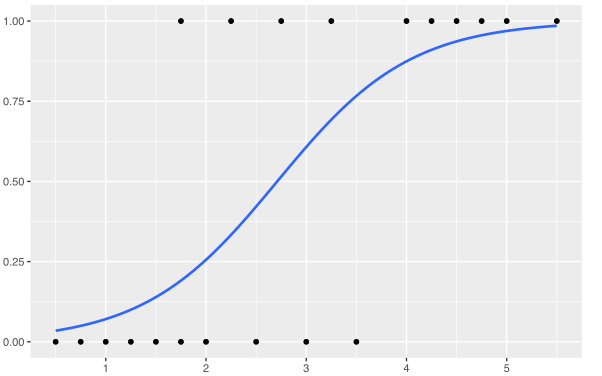

Тут, передбачатись буде те, чи пасажир вижив на титаніку чи ні, тому у масиви незалежних даних йде набір даних без стовпчика 'Survived', а сам стовпчик йде як залежна змінна. <br>

Для побудови моделі використовується клас [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html):

In [13]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

Тренування моделі:

In [14]:
logmodel.fit(X_train_scaled,y_train)

LogisticRegression()

In [15]:
predictions = logmodel.predict(X_test_scaled)

### [Матриця конфузії](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

Матриця конфузії - це таблиця, яка використовується для вимірювання успішності роботи алгоритму класифікації. Вона візуалізує та підсумовує успішність роботи алгоритму.

Матриця конфузії у випадку двох класів має наступний вигляд:

| | Реальне позитивне | Реальне негативне |
| --- | --- | --- |
| __Передбачене позитивне__ | Правдиве позитивне (TP) | Неправдиве позитивне (FP) |
| __Передбачене негативне__ | Неправдиве негативне (FN) | Правдиве негативне (TN) |

Нехай є модель, яка класифікує елементи і має класифікувати спостереження як яблука, або як виноград. Для такої моделі матриця конфузії буде виглядати так:

| | Реальне позитивне (Яблуко) | Реальне негативне (Виноград) |
| --- | --- | --- |
| __Передбачене позитивне (Яблуко)__ | Правдиве позитивне (TP) | Неправдиве позитивне (FP) |
| __Передбачене негативне (Виноград)__ | Неправдиве негативне (FN) | Правдиве негативне (TN) |

Вона складається з наступних чотирьох елементів:
1. Правдиве позитивне (True Positive - TP): показує кількість значень які у реальності та у передбачені є однаковими і є позитивними. У цьому випадку - у реальності спостереження є яблуками і модель класифікували ці значення як яблука;
1. Неправдиве позитивне (False Positive - FP): показує кількість значень, які були класифіковані як елементи позитивного класу, але насправді вони належать до негативного. Такі помилки також відомі як помилки першого типу - Type I Error. У цьому випадку це якщо спостреження насправді є виноградом, але модель класифікувала їх як яблука;
1. Неправдиве негативне (False Negative - FN): показує кількість значень, які були класифіковані як елементи негативного класу, але насправді вони належать до позитивного. Такі помилки також відомі як помилки другого типу - Type IІ Error. У цьому випадку це якщо спостреження насправді є яблуками, але модель класифікувала їх як виноград;
1. Правдиве негативне (True Negative - TN): показує кількість значень які у реальності та у передбачені є однаковими і є негативними. У цьому випадку - у реальності спостереження є виноградом і модель класифікували ці значення як виноград;

In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[135  19]
 [ 38  76]]


### [Характеристики моделі](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

З допомогою матриці конфузії можна обрахувати інші характеристики успішності роботи моделі:

1. Акуратність. Обраховує як часто модель правильно класифікує спостереження.
Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$
Акуратність є хорошою характеристикою коли цільові класи є добре збалансованими. Але у випадку, коли на 99 спостережень одного класу випадає 1 спостереження іншого класу, акуратність буде дорівнювати 99%, хоча насправді це так не є. 
2. Точність. Показує, як багато правильно класифікованих елементів були позитивними.
Precision = $\frac{TP}{TP + FP}$
3. Відклик (Чутливість). Показує, скільки реальних позитивних значень модель змогла правильно передбачити. <br>
Recall = $\frac{TP}{TP+FN}$
4. F1 рахунок. Дає комбіновану ідеї про метрики точності та відклику. Є максимальним, коли відклик дорівнює точності.
F1 = $\frac{2 * Precision * Recall}{Precision + Recall}$
5. Підтримка (Support). Показує, скільки разів елементи класу попадались у тренувальних даних.

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



### Передбачення.

In [18]:
print(logmodel.predict(scaler.transform([[32, 3, 25.0 ,1 ,0 , 25.0, 1, 0, 0]])))

[0]


e:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Алгоритм найближчих K cусідів ([KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).
Кроки алгоритму:
1. Обираються число _k_ сусідів;
1. Береться _k_ найближчих сусідів нового спостереження через обраховування відстані;
1. Серед цих _k_ сусідів обраховується кількість точок, які належать до кожного кластеру;
1. Нова точка призначається до тієї категорії, з якої було пораховано найбільше сусідів.
Відстань може обраховуватись як за Евклідом, так і іншими формулами відповідно до завдання.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
pred = knn.predict(X_test_scaled)

e:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
print(confusion_matrix(y_test, pred))

[[126  28]
 [ 45  69]]


In [22]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       154
           1       0.71      0.61      0.65       114

    accuracy                           0.73       268
   macro avg       0.72      0.71      0.71       268
weighted avg       0.73      0.73      0.72       268



## Алгоритм опорних векторів.

Алгоритм опорних векторів (англ. Support Vector Machine - SVM) - знаходить найкращу лінію для розмежування кількох класів елементів. Ця лінія шукається через найбільшу межу (Maximum Margin) - лінію, яка розділяє два класи і знаходиться на максимальному віддалені від меж обох класів.

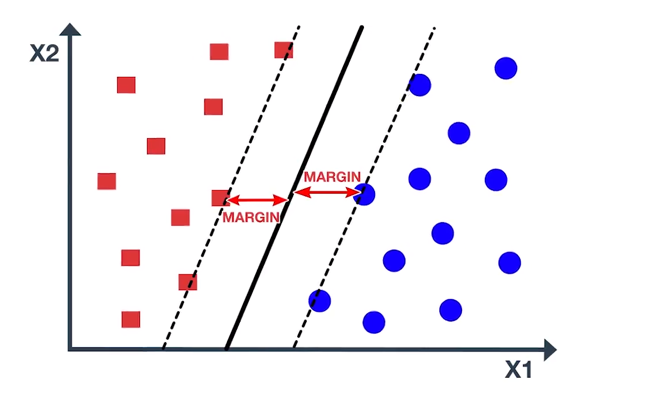

На результати роботи впливають тільки точки, які є опорними векторами. Якщо забрати всі інші точки даних, то результати роботи не змінюються. У багатовимірних просторох точки даних є векторами, і оскільки саме ці вектори впливають на роботу алгоритму, вони називаються опорними векторами.
Особливістю цього алгоритму є те, що він бере до уваги елементи, які найбільше виділяються серед елементів свого класу, які стають опорними векторами і по яких і будується розподіл між класами.

Для класифікації використовується клас [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (Support Vector Classifier).

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 101)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=101)

In [24]:
pred = classifier.predict(X_test)

In [25]:
print(confusion_matrix(y_test, pred))

[[133  21]
 [ 40  74]]


In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



## [Алгоритми машинного навчання на деревах](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Алгоритми машинного навчання на дерева прийняття рішень працюють через поділ всієї множини точок. Поділ відбувається таким чином, щоб у одному з них була максимальна кількість елементів одного класу. Також поділ намагається мінімізувати ентропію.

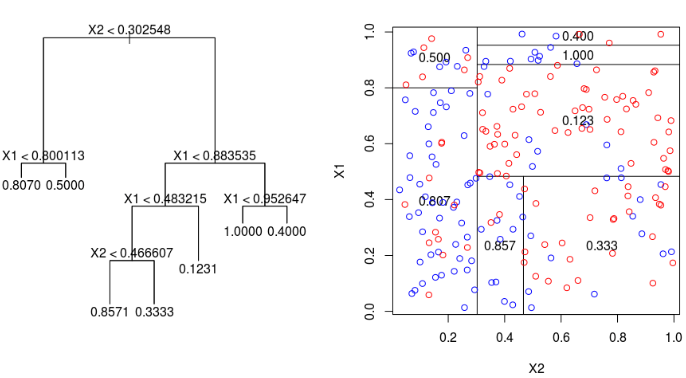

Термінальні листки дерева завжди вказують до якого класу належить елемент. Також можливі модифікації, коли під час спуску по дереву замість перевірки умоми використовують ймовірність для визначення до якого класу належить елемент.


In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
pred = classifier.predict(X_test)

In [29]:
print(confusion_matrix(y_test, pred))

[[119  35]
 [ 36  78]]


In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       154
           1       0.69      0.68      0.69       114

    accuracy                           0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.73      0.74      0.73       268



### [Наївний Баєсівський класифікатор](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

Алгоритм роботи класифікатора:
1. Застосовується теорема Баєса для класу A: <br>
$ P(A|X) = \frac{P(X|A) * P(A)}{P(X)}$
2. Застосовується теорема Баєса для класу B: <br>
$ P(B|X) = \frac{P(X|B) * P(B)}{P(X)}$
3. Порівнюються обраховані ймовірності P(A|X) i P(B|X). З цього порівняння вирішується, до якого класу віднести нову точку.

In [31]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [32]:
pred = classifier.predict(X_test)

In [33]:
print(confusion_matrix(y_test, pred))

[[129  25]
 [ 38  76]]


In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       154
           1       0.75      0.67      0.71       114

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.76       268
weighted avg       0.76      0.76      0.76       268



Алгоритм називається "наївним", бо теорема Баєса вимагає певних припущень незалежності. І це наївно надіятись на те, що ці припущення завжди виконуються. Однак, цей алгоритм доволі часто застосовують коли дані мають невелику кореляцію і він показує хороші результати.